In [132]:
a=[2.500000062864274] 
b=[2.5000000768341124]

print(a.extend(b))

None


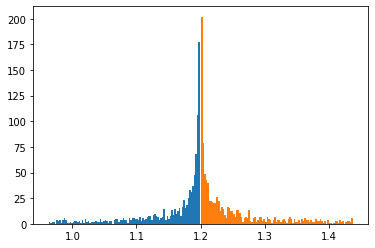

In [82]:
import numpy as np
import matplotlib.pyplot as plt
a=np.arange(-10,10,0.1)
#sinh(x)=[e^x-e^(-x)]/2
# y=np.sinh(a)
# plt.plot(a,y)

def gen_price(last_price=1.2,gap_precent=0.001,price_scale=0.2,bid_size=100,ask_size=100):
    Y=np.sinh(10)
    y_max=Y*price_scale
    y_min=Y*gap_precent
    a_max=np.arcsinh(y_max)
    a_min=np.arcsinh(y_min)

    a=np.random.uniform(a_min,a_max,size=[ask_size])
    # print(np.sinh(a),Y,last_price)
    ask_price=np.sinh(a)/Y*last_price+last_price

    a=np.random.uniform(-a_max,-a_min,size=[bid_size])
    bid_price=np.sinh(a)/Y*last_price+last_price
    
    return ask_price,bid_price
ask_price,bid_price=gen_price(last_price=1.2,bid_size=1000,ask_size=1000)
_=plt.hist(bid_price,100)
_=plt.hist(ask_price,100)

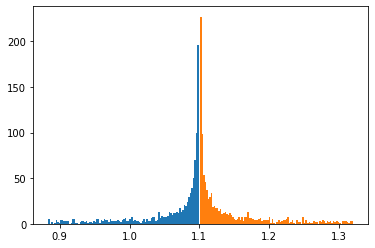

In [5]:
ask_price,bid_price=gen_price(last_price=1.1,bid_size=1000,ask_size=1000)
_=plt.hist(bid_price,100)
_=plt.hist(ask_price,100)

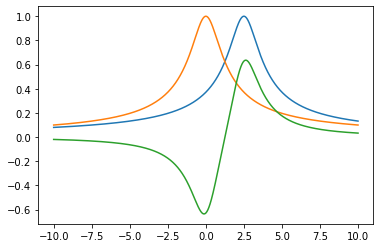

In [106]:
x=np.arange(-10,10,0.001)
delta=2.5
def p(a):
    return (1+a*np.power(np.power(a,2)+1,-0.5))/(a+np.sqrt(np.power(a,2)+1))

y=list(map(p, x))
y1=list(map(p,x-delta))
plt.plot(x,y1)
plt.plot(x,y)
plt.plot(x,np.array(y1)-np.array(y))

[-10.     -9.999  -9.998 ...   9.997   9.998   9.999]


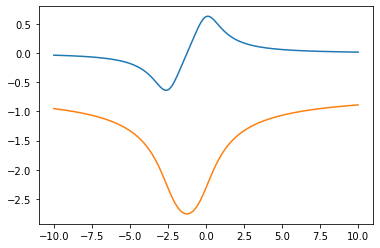

In [114]:

def delta_p(x):
    return p(x)-p(x+delta)
def delta_F(x):
    return F(x)-F(x+delta)
print(x)
y2=list(map(delta_p,x))
y3=list(map(delta_F,x))+delta_F(delta)
plt.plot(x,y2)
plt.plot(x,y3)

In [ ]:
import math
print(delta_p(delta))
print(delta_F(delta+10)-delta_F(delta))
def gen_dis(size=100,low=0,up=1):#cdf必须递增或者在递增区间
    mid=(low+up)/2
    if size==1: return [mid]
    p_left=(delta_F(mid)-delta_F(low))/(delta_F(up)-delta_F(low))
    if p_left>=0.5:
        size_left=math.ceil(size*p_left)
        size_right=size-size_left
    else:
        size_right=math.ceil(size*(1-p_left))
        size_left=size-size_right
    if size_left==0:return gen_dis(size=size_right,low=mid,up=up)
    if size_right==0:return gen_dis(size=size_left,low=low,up=mid)
    # print(size_left,p_left,size)
    left=gen_dis(size=size_left,low=low,up=mid)
    right=gen_dis(size=size_right,low=mid,up=up)
    left.extend(right)
    return left
        
res=gen_dis(size=100,low=2.5,up=10)
plt.hist(res,100)

Error: Session cannot generate requests

(array([ 4.,  3.,  4.,  3.,  4.,  4.,  4.,  3.,  4.,  4.,  5.,  4.,  4.,
         5.,  5.,  4.,  5.,  5.,  6.,  5.,  6.,  5.,  6.,  6.,  7.,  7.,
         6.,  8.,  7.,  8.,  8.,  9.,  9., 10., 10., 11., 12., 12., 13.,
        15., 15., 17., 19., 20., 23., 24., 28., 29., 32., 33., 34., 32.,
        29., 28., 24., 23., 20., 19., 17., 15., 15., 13., 12., 12., 11.,
        10., 10.,  9.,  9.,  8.,  8.,  7.,  8.,  6.,  7.,  7.,  6.,  6.,
         5.,  6.,  5.,  6.,  5.,  5.,  4.,  5.,  5.,  4.,  4.,  5.,  4.,
         4.,  3.,  4.,  4.,  4.,  3.,  4.,  3.,  4.]),
 array([-7.5, -7.3, -7.1, -6.9, -6.7, -6.5, -6.3, -6.1, -5.9, -5.7, -5.5,
        -5.3, -5.1, -4.9, -4.7, -4.5, -4.3, -4.1, -3.9, -3.7, -3.5, -3.3,
        -3.1, -2.9, -2.7, -2.5, -2.3, -2.1, -1.9, -1.7, -1.5, -1.3, -1.1,
        -0.9, -0.7, -0.5, -0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9,  1.1,
         1.3,  1.5,  1.7,  1.9,  2.1,  2.3,  2.5,  2.7,  2.9,  3.1,  3.3,
         3.5,  3.7,  3.9,  4.1,  4.3,  4.5,  4.7,  4.9,  5.1,  5

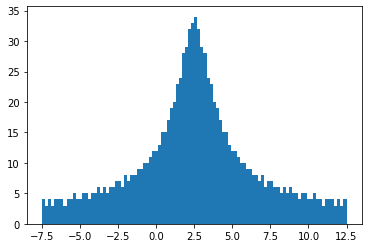

In [95]:


x=np.arange(-10,10,0.001)
def F(a):
    return np.log(a+np.sqrt(np.power(a,2)+1))
# y=list(map(F,x))
# plt.plot(x,y)
# plt.plot(x,np.sinh(x))
fa=500/(F(10)-F(0))
a=[]
for i in range(-500,501):
    a.append(np.sinh(i/fa+F(0)))

bids_price=list(filter(lambda x:x<0,a))
asks_price=list(filter(lambda x:x>0,a))

b=[]
for i in range(-500,501):
    b.append(np.sinh(i/fa+F(0))+delta)

plt.hist(b,100)
# a->b

# 撤销0,delta之间的卖单
for i in asks_price:
    if i<delta:
        asks_price.remove(i)


    
# 补挂delta，y_max之间的卖单


In [102]:

print(len(bids_price),len(asks_price))

500 500


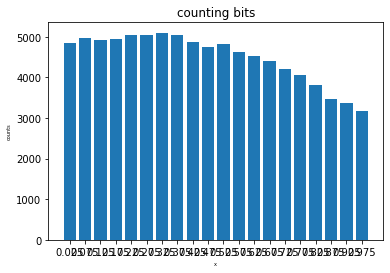

In [103]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import collections

lookup_table_size = 40
CDFlookup_table = np.zeros((lookup_table_size))

count_dict = dict()
bin_count = 20

def inverse_cdf_numerically(y):
    global lookup_table_size
    global CDFlookup_table
    value = 0.0
    for i in range(lookup_table_size):
        x = i * 1.0 / (lookup_table_size - 1)
        value += pdf2(x)
        CDFlookup_table[i] = value
    CDFlookup_table /= value  # normalize the cdf

    if y < CDFlookup_table[0]:  
        t = y / CDFlookup_table[0]
        return t / lookup_table_size
    index = -1
    for j in range(lookup_table_size):
        if CDFlookup_table[j] >= y:
            index = j
            break
    # linear interpolation
    t = (y - CDFlookup_table[index - 1]) / \
        (CDFlookup_table[index] - CDFlookup_table[index - 1])
    fractional_index = index + t  # 因为index从0开始,所以不是 (index-1)+t
    return fractional_index / lookup_table_size


def inverseCDF():
    """
    return the x value in PDF
    """
    uniform_random = random.random()
    return inverse_cdf_numerically(uniform_random)


def pdf2(x):
    return (x * x * x - 10.0 * x * x + 5.0 * x + 11.0) / (10.417)

def draw_pdf(D):
    global bin_count
    D = collections.OrderedDict(sorted(D.items()))
    plt.bar(range(len(D)), list(D.values()), align='center')
    value_list = [(key + 0.5) / bin_count for key in D.keys()]
    plt.xticks(range(len(D)), value_list)
    plt.xlabel('x', fontsize=5)
    plt.ylabel('counts', fontsize=5)
    plt.title('counting bits')
    plt.show()


for i in range(90000):
    x = inverseCDF()
    bin = math.floor(x * bin_count)  # type(bin): int
    count_dict[bin] = count_dict.get(bin, 0) + 1

draw_pdf(count_dict)


In [1]:
!pip install sympy

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [10]:
from IPython.display import Latex,display
import sympy
sympy.init_printing()
x,y=sympy.symbols("x,y")
f=x**2+sympy.Abs(y)
display(Latex(f"$$fgf$$"))

<IPython.core.display.Latex object>

In [15]:
from IPython.display import display, Latex
import sympy as sy
sy.init_printing()

x,y=sy.symbols("x y")
f=x**2+3*x-5
display(Latex(f"$$f(x)={sy.latex(f)}$$"))

xx=3
sy.pprint(f"f({xx})={f.subs({x:xx})}")
yy=4
f1=sy.sqrt(x**2+y**2)

display(Latex(f"$$f_1(x,y)={sy.latex(f1)}$$"))
sy.pprint(f"f1({xx},{yy})={f1.subs({x:xx, y:yy})}")

<IPython.core.display.Latex object>

f(3)=13


<IPython.core.display.Latex object>

f1(3,4)=5


# Latex(r"$f(x) = 3x + 7$")

$$ \int_{\infty}^{+\infty}{(x^2+3)dx}$$
$$\left. \frac{\partial f(x, y)}{\partial x}\right|_{x=0}\qquad$$